## Data investigation

Data import

Import libs

In [1]:
import sys
import os
import re
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import pdb
from datetime import datetime


In [2]:
pwd()

'C:\\Users\\Ogi\\Datathon Sep 2018'

In [3]:
## Import the sample data
## clock the time for import

tic = time.time()

df = pd.read_csv("20180920_Kaufland_case_IoT_and_predictive_maintenance.csv", \
                 sep = ';', encoding='utf-8')

tac = time.time()

diff = tac - tic

print("Time imprt had taken {a:.2f} seconds".format(a = diff))

Time imprt had taken 12.56 seconds


In [4]:
## Create a copy of the data
data = df.copy()

In [5]:
## Describe data
df.shape

(3860434, 7)

In [63]:
df[df.realvalue < 0]

,machine_name,sensor_type,date_measurement,start_timestamp,end_timestamp,realvalue,unit,date_measurement_f,start_timestamp_f,end_timestamp_f,hour,year,month


In [6]:
## Look at the column names
df.columns

Index(['ifm_analysis_sensordata_for_datathon_final.machine_name',
       'ifm_analysis_sensordata_for_datathon_final.sensor_type',
       'ifm_analysis_sensordata_for_datathon_final.date_measurement',
       'ifm_analysis_sensordata_for_datathon_final.start_timestamp',
       'ifm_analysis_sensordata_for_datathon_final.end_timestamp',
       'ifm_analysis_sensordata_for_datathon_final.realvalue',
       'ifm_analysis_sensordata_for_datathon_final.unit'],
      dtype='object')

In [9]:
df.keys()

Index(['ifm_analysis_sensordata_for_datathon_final.machine_name',
       'ifm_analysis_sensordata_for_datathon_final.sensor_type',
       'ifm_analysis_sensordata_for_datathon_final.date_measurement',
       'ifm_analysis_sensordata_for_datathon_final.start_timestamp',
       'ifm_analysis_sensordata_for_datathon_final.end_timestamp',
       'ifm_analysis_sensordata_for_datathon_final.realvalue',
       'ifm_analysis_sensordata_for_datathon_final.unit'],
      dtype='object')

In [7]:
df.describe()

,ifm_analysis_sensordata_for_datathon_final.realvalue
count,3.860434e+06
mean,1.221669e+03
std,1.893225e+03
min,2.000000e-03
25%,2.379000e+00
50%,7.261400e+02
75%,1.357672e+03
max,2.407599e+04


In [8]:
df.head(3)

,ifm_analysis_sensordata_for_datathon_final.machine_name,ifm_analysis_sensordata_for_datathon_final.sensor_type,ifm_analysis_sensordata_for_datathon_final.date_measurement,ifm_analysis_sensordata_for_datathon_final.start_timestamp,ifm_analysis_sensordata_for_datathon_final.end_timestamp,ifm_analysis_sensordata_for_datathon_final.realvalue,ifm_analysis_sensordata_for_datathon_final.unit
0,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:42.823,2016-09-02 15:26:42.823,0.395,mm/s
1,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:45.653,2016-09-02 15:26:45.653,0.577,mm/s
2,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:48.467,2016-09-02 15:26:48.467,0.717,mm/s


In [12]:
df.dtypes

ifm_analysis_sensordata_for_datathon_final.machine_name         object
ifm_analysis_sensordata_for_datathon_final.sensor_type          object
ifm_analysis_sensordata_for_datathon_final.date_measurement     object
ifm_analysis_sensordata_for_datathon_final.start_timestamp      object
ifm_analysis_sensordata_for_datathon_final.end_timestamp        object
ifm_analysis_sensordata_for_datathon_final.realvalue           float64
ifm_analysis_sensordata_for_datathon_final.unit                 object
dtype: object

In [9]:
# standardize the column names
def StandardizeNames(df):
    l = df.columns
    #pdb.set_trace()
    cols = [c.replace('ifm_analysis_sensordata_for_datathon_final.','').
              lower() for c in l]
    return cols

In [10]:
df.columns = StandardizeNames(df)

In [11]:
df.keys()

Index(['machine_name', 'sensor_type', 'date_measurement', 'start_timestamp',
       'end_timestamp', 'realvalue', 'unit'],
      dtype='object')

In [12]:
## Convrt to datetime
df["date_measurement_f"] = pd.to_datetime(df["date_measurement"])

In [13]:
## Convrt to datetime
df["start_timestamp_f"] = pd.to_datetime(df["start_timestamp"])

In [14]:
## Convrt to datetime
df["end_timestamp_f"] = pd.to_datetime(df["end_timestamp"])

In [15]:
df.dtypes

machine_name                  object
sensor_type                   object
date_measurement              object
start_timestamp               object
end_timestamp                 object
realvalue                    float64
unit                          object
date_measurement_f    datetime64[ns]
start_timestamp_f     datetime64[ns]
end_timestamp_f       datetime64[ns]
dtype: object

In [70]:
df.head(18)

,machine_name,sensor_type,date_measurement,start_timestamp,end_timestamp,realvalue,unit,date_measurement_f,start_timestamp_f,end_timestamp_f,hour,year,month
0,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:42.823,2016-09-02 15:26:42.823,0.395,mm/s,2016-09-02,2016-09-02 15:26:42.823,2016-09-02 15:26:42.823,15,2016,9
1,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:45.653,2016-09-02 15:26:45.653,0.577,mm/s,2016-09-02,2016-09-02 15:26:45.653,2016-09-02 15:26:45.653,15,2016,9
2,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:48.467,2016-09-02 15:26:48.467,0.717,mm/s,2016-09-02,2016-09-02 15:26:48.467,2016-09-02 15:26:48.467,15,2016,9
3,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:51.293,2016-09-02 15:26:51.293,0.832,mm/s,2016-09-02,2016-09-02 15:26:51.293,2016-09-02 15:26:51.293,15,2016,9
4,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:54.107,2016-09-02 15:26:54.107,0.941,mm/s,2016-09-02,2016-09-02 15:26:54.107,2016-09-02 15:26:54.107,15,2016,9
5,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:56.933,2016-09-02 15:26:56.933,1.042,mm/s,2016-09-02,2016-09-02 15:26:56.933,2016-09-02 15:26:56.933,15,2016,9
6,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:59.763,2016-09-02 15:26:59.763,1.106,mm/s,2016-09-02,2016-09-02 15:26:59.763,2016-09-02 15:26:59.763,15,2016,9
7,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:27:02.577,2016-09-02 15:27:02.577,1.176,mm/s,2016-09-02,2016-09-02 15:27:02.577,2016-09-02 15:27:02.577,15,2016,9
8,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:27:05.403,2016-09-02 15:27:05.403,1.245,mm/s,2016-09-02,2016-09-02 15:27:05.403,2016-09-02 15:27:05.403,15,2016,9
9,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:27:08.217,2016-09-02 15:27:08.217,1.258,mm/s,2016-09-02,2016-09-02 15:27:08.217,2016-09-02 15:27:08.217,15,2016,9


In [16]:
df['start_timestamp_f'][0].month

9

## Plot the data in order to see some insights

In [ ]:
ax = sns.tsplot(data=df[0:10],time = "start_timestamp_f", unit = "machine_name", \
               condition = "machine_name", value = "realvalue")

C:\Users\Ogi\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


ValueError: Index contains duplicate entries, cannot reshape

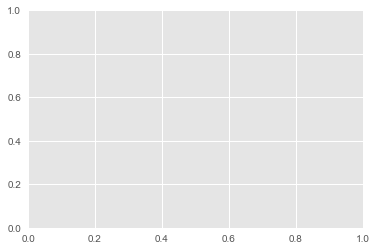

In [17]:
ax = sns.tsplot(data=df[10:],time = "start_timestamp_f", unit = "machine_name", \
               condition = "machine_name", value = "realvalue", color = "black")

In [42]:
table1 = pd.pivot_table(df, index = 'sensor_type', \
               values = 'realvalue', columns = 'machine_name', \
               aggfunc={'realvalue': [min, max, np.mean]})

In [ ]:
table1

In [32]:
table1.to_csv("Pivot table.csv", \
                 sep = ';', encoding='utf-8')

PermissionError: [Errno 13] Permission denied: 'Pivot table.csv'

In [46]:
df['hour'] = [df['start_timestamp_f'][x].hour for x in range(data.shape[0])]

In [48]:
df['year'] = [df['start_timestamp_f'][x].year for x in range(data.shape[0])]

In [49]:
df['month'] = [df['start_timestamp_f'][x].month for x in range(data.shape[0])]

In [52]:
table2 = pd.pivot_table(df, index = ['machine_name','sensor_type'], \
               values = 'realvalue', columns = 'hour', \
               aggfunc={'realvalue': [min, max, np.mean]})

In [44]:
table2.to_csv("Pivot table Hour Diostribution.csv", \
                 sep = ';', encoding='utf-8')

In [56]:
table3 = pd.pivot_table(df, index = ['machine_name','sensor_type'], \
               values = 'realvalue', columns = 'month', \
               aggfunc={'realvalue': [min, max, np.mean]})

In [59]:
table3.to_csv("Pivot table Monthly Diostribution.csv", \
                 sep = ';', encoding='utf-8')

PermissionError: [Errno 13] Permission denied: 'Pivot table Monthly Diostribution.csv'

In [64]:
table4 = pd.pivot_table(df, index = ['machine_name','sensor_type'], \
               values = 'realvalue', columns = 'month', \
               aggfunc={'realvalue': [min, max, np.mean]})

In [67]:
table5 = pd.pivot_table(df, index = ['machine_name','month'], \
               values = 'realvalue', columns = 'hour', \
               aggfunc={'realvalue': [max]})

In [72]:
table5.to_csv("Pivot table Month Hour Diostribution.csv", \
                 sep = ';', encoding='utf-8')

PermissionError: [Errno 13] Permission denied: 'Pivot table Month Hour Diostribution.csv'

In [74]:
df['month'].dtype

dtype('int64')

In [78]:
test = df[(df['month'] == 3) & (df['machine_name'] == 'RBG2')]

In [86]:
table6 = pd.pivot_table(test, index = ['date_measurement_f'], \
               values = 'realvalue', columns = 'hour', \
               aggfunc={'realvalue': [max]})

In [87]:
table6.to_csv("Pivot table Special.csv", \
                 sep = ';', encoding='utf-8')